## Adopted Optimization Methodology


Genetic algorithm (GA) or Evolutionary algorithm was picked as a suitable choice for this problem. 

There are three (3) major operations in GA: 
* Selection 
* Cross-over (Combination) and
* Mutation (Change)

In our proposed method, a stochastic search is begun by creating a number of solution strings named **“Initial Population” and fitnesses** for strings are evaluated using Equation.

To produce the next generation, strings are randomly chosen from the initial population based on their fitnesses, and then cross-over and mutation are operated on the strings. Crossover is responsible for transition the parent’s traits to their child. The mutation randomly changes a string to recover new traits. In the GA, population evolves after a number of generations and can attain the optimal solution. Up to now, many approaches are presented based on general principles of GA.

<!-- ## Adopted Step by Step Elimination Method -->
<!-- **Source:** https://www.scirp.org/pdf/JWARP_2013032510150088.pdf -->
<!-- <img src='flowchart.jpg' width=400, height=400> -->

## Import and plot an EPANET model


In [10]:
import wntr
import pygad
import numpy as np
import matplotlib.pyplot as plt
import numpy

## Load our network into Python

In [2]:
wn = wntr.network.WaterNetworkModel('Real_Synthetic_Net.inp')  

# Add an artificial leak to Nodes (6,8 and 10)
node = wn.get_node('N6')
node.add_leak(wn, area=0.00015, start_time=0, end_time=1)
node.add_leak

# node = wn.get_node('N8')
# node.add_leak(wn, area=0.00015, start_time=0, end_time=1)
# node.add_leak

# node = wn.get_node('N10')
# node.add_leak(wn, area=0.00015, start_time=0, end_time=1)
# node.add_leak

<bound method Junction.add_leak of <Junction 'N6', elevation=7.0, demand_timeseries_list=<Demands: [<TimeSeries: base_value=0.0101, pattern_name=None, category='None'>]>>>

## Launch network and plot results

In [3]:
# Launch simulation:
sim = wntr.sim.WNTRSimulator(wn)

# store the simulation results in variable "results"
results = sim.run_sim()

# Plot results on the network:
pressure_at_0hr = results.node['pressure'] # pressures at time-step 0 are stored
# wntr.graphics.plot_network(wn, node_attribute=None, node_size=150, title='Pressure at 0 hours')

# print (pressure_at_0hr)

### Change parameter value

In [4]:
# Variable "junction" is associated to N8
junction = wn.get_node('N6')

# Demand is changed in N8
junction.demand_timeseries_list[0].base_value = 0 

# The new Epanet model is launched
results = sim.run_sim() 

# New pressures are stored
pressure_at_0hr = results.node['pressure'] 
#wntr.graphics.plot_network(wn, node_attribute=pressure_at_0hr, node_size=50, title='Pressure at 0 hours')
results

## Optimization


In [15]:
function_inputs = 1 #array save multiple things
desired_output = 26.5 # Function output, the objective is to match the measured leak.

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

### Optimization setup

In [16]:
num_generations = 100 # Number of generations.
num_parents_mating = 2 # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 30 # Number of solutions in the population.
num_genes = 1 #len(function_inputs) --> this can be an array
init_range_low = 0
init_range_high = 1
parent_selection_type = "sss" # Type of parent selection.
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.
crossover_type = "single_point" # Type of the crossover operator.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 100 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.
last_fitness = 0

### Create GA instance and run

In [47]:
def callback_generation(ga_instance): # This function prints algorithm progress
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

In [48]:
# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation
                      )

### Running the GA to optimize the parameters of the function.

In [49]:
ga_instance.run()

Generation = 1
Fitness    = 0.04020637241882768
Change     = -4518.805347301547
Generation = 2
Fitness    = 0.0416966918016909
Change     = 0.0014903193828632241
Generation = 3
Fitness    = 0.04343282242791714
Change     = 0.00173613062622624
Generation = 4
Fitness    = 0.04509257649867779
Change     = 0.0016597540707606467
Generation = 5
Fitness    = 0.047184610807637965
Change     = 0.0020920343089601764
Generation = 6
Fitness    = 0.049460906304505704
Change     = 0.002276295496867739
Generation = 7
Fitness    = 0.051959836167485715
Change     = 0.002498929862980011
Generation = 8
Fitness    = 0.05475619978742517
Change     = 0.002796363619939457
Generation = 9
Fitness    = 0.05684363373667992
Change     = 0.002087433949254751
Generation = 10
Fitness    = 0.060237954895339174
Change     = 0.003394321158659251
Generation = 11
Fitness    = 0.06400081402348014
Change     = 0.0037628591281409635
Generation = 12
Fitness    = 0.06788637946188934
Change     = 0.0038855654384092053
Generati

### Plot GA results

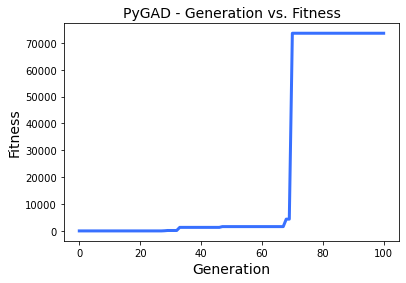

Parameters of the best solution : [26.5]
Fitness value of the best solution = 73579.19268024684
Index of the best solution : 0


In [50]:
# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

In [22]:
# (6) The solution is confirmed launching Epanet:
# Change a parameter value (demand at N8) and run the model again
junction = wn.get_node('N8')
junction.demand_timeseries_list[0].base_value = function_inputs*solution[0]
results = sim.run_sim()
# Get and print the new pressure
pressure = results.node['pressure']
pressure

,N1,N5,N10,N7,N2,N6,N3,N8,N13,N9,N14,N4,N11,N12,N15,N16,Reservior
7200,-32103.941171,-44037.60169,-44032.655235,-409458.979882,-66829.398115,-92395.822392,-200610.217312,-727614.458318,-727609.022255,-594804.449822,-594803.761074,-200608.302025,-44033.783298,-727615.029291,-44032.659281,-409458.982877,0.0


In [ ]:
ga_instance.save('genetic_algo')

In [ ]:
import pickle

In [ ]:
model = pickle.load(open('genetic_algo.pkl', 'rb'))

In [ ]:
model.predict()